In [1]:
from google.colab import files

uploaded = files.upload()


Saving ushape.csv to ushape.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:


df = pd.read_csv('ushape.csv')
df.head()


,x1,x2,label
0,0.1,0.10,0
1,0.2,0.10,0
2,0.3,0.15,0
3,0.4,0.25,0
4,0.5,0.40,0


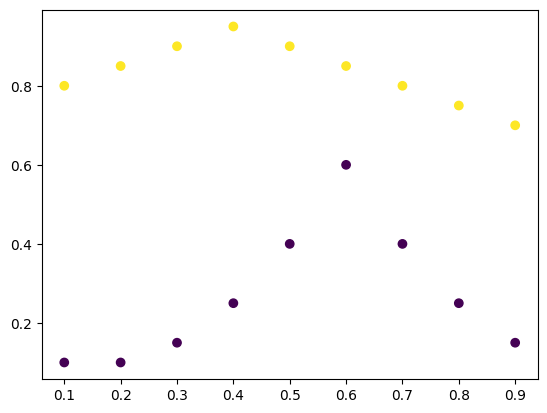

In [4]:
plt.scatter(df['x1'] ,df['x2'],c=df['label'])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [18]:
model = Sequential()

model.add(Dense(10,activation='tanh',input_dim=2))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
initial_weights = model.get_weights()

In [12]:
initial_weights[0] = np.random.rand(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.rand(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.rand(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.rand(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.rand(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)


In [13]:
model.set_weights(initial_weights)

In [14]:
model.get_weights()

[array([[0.4905917 , 0.6351487 , 0.5643082 , 0.47839198, 0.25424442,
         0.17270228, 0.04113116, 0.26023075, 0.6264526 , 0.5152829 ],
        [0.34164092, 0.09745359, 0.57214904, 0.5408093 , 0.5649594 ,
         0.12482128, 0.16804315, 0.26840225, 0.25349128, 0.32450026]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.12867936, 0.28075036, 0.09324048, 0.31514958, 0.148778  ,
         0.2518515 , 0.09561452, 0.22551776, 0.04176333, 0.1340707 ],
        [0.0427014 , 0.12615924, 0.10348503, 0.09659592, 0.1280251 ,
         0.0568199 , 0.09070216, 0.18174736, 0.02817662, 0.00538944],
        [0.10155949, 0.31462502, 0.10992293, 0.27811712, 0.21035798,
         0.1206104 , 0.15799212, 0.1313686 , 0.14605442, 0.06357188],
        [0.31462315, 0.1716693 , 0.2158036 , 0.03519775, 0.13227789,
         0.29673773, 0.11415433, 0.0468531 , 0.17303286, 0.24613555],
        [0.30056328, 0.3019322 , 0.10565667, 0.25523692, 0.22924984,
        

In [15]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [16]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.3571 - loss: 0.8803 - val_accuracy: 1.0000 - val_loss: 0.2911
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.3571 - loss: 0.8726 - val_accuracy: 1.0000 - val_loss: 0.2958
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.3571 - loss: 0.8649 - val_accuracy: 1.0000 - val_loss: 0.3007
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.3571 - loss: 0.8574 - val_accuracy: 1.0000 - val_loss: 0.3057
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.3571 - loss: 0.8500 - val_accuracy: 1.0000 - val_loss: 0.3108
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.3571 - loss: 0.8428 - val_accuracy: 1.0000 - val_loss: 0.3160
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.3571 - loss: 0.8357 - val_accuracy: 1.0000 - val_loss: 0.3212
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.3571 - loss: 0.8288 - val_accuracy: 1.0000 - val_loss:

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


<Axes: >

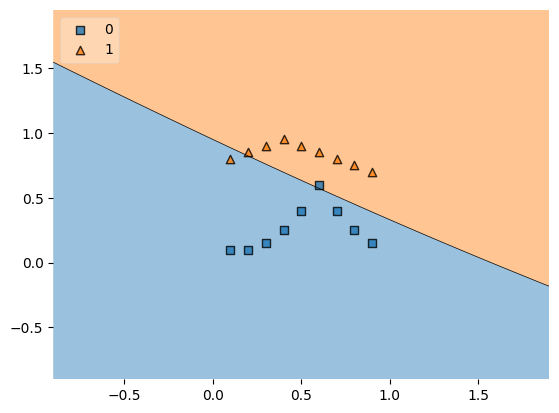

In [17]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model, legend = 2)